In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("../All data/emails.csv", encoding = 'latin-1')
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
data.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)

In [4]:
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
data['category'] = data['v1']
data['text'] = data['v2']
data.drop(['v1', 'v2'], axis=1, inplace=True)
data['lengthOfMessage'] = data['text'].apply(len)
data.head(10)

,category,text,lengthOfMessage
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61
5,spam,FreeMsg Hey there darling it's been 3 week's n...,148
6,ham,Even my brother is not like to speak with me. ...,77
7,ham,As per your request 'Melle Melle (Oru Minnamin...,160
8,spam,WINNER!! As a valued network customer you have...,158
9,spam,Had your mobile 11 months or more? U R entitle...,154


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 3 columns):
category           5572 non-null object
text               5572 non-null object
lengthOfMessage    5572 non-null int64
dtypes: int64(1), object(2)
memory usage: 130.7+ KB


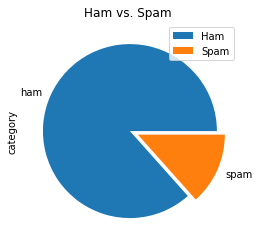

In [7]:
data['category'].value_counts().plot(kind='pie', explode=[0,0.1])
plt.title('Ham vs. Spam ')
plt.legend(['Ham', 'Spam'])
plt.show()

**Short Note**

A lot of messages are actually not spam. About 86% of our dataset consists of normal messages.

* While we split our data set into train and test or when we use cross validation, we will have to use stratified sampling, otherwise we have a chance of our training model being skewed towards normal messages. If the sample we choose to train our model consists majorly of normal messages, it may end up predicting everything as ham and we might not be able to figure this out since most of the messages we get are actually ham and will have a pretty good accuracy.

* A very basic model would be a model that predicts everything as ham. It would have a decent accuracy. But then again, is that right? No. We will then have to use an accuracy metric that keeps this in mind. 

Goal : We don't mind if we miss the odd spam message but we surely don't want to mark a ham message as spam i.e Precision is very important. Hence we will use fbeta score as our accuracy metric with inclination towards Precision

In [8]:
# import nltk
# nltk.download('stopwords')

In [9]:
import nltk
from nltk.corpus import stopwords
import string
tokenizer = nltk.tokenize.TreebankWordTokenizer()
stemmer = nltk.stem.PorterStemmer()

def cleanText(message):
    # punctuation removing
    message = message.translate(str.maketrans('', '', string.punctuation))
    
    # stopwords removng
    message = [stemmer.stem(word.lower()) for word in message.split() if word not in stopwords.words('english')]              
    return " ".join(message)

In [10]:
data['text'] = data['text'].apply(cleanText)
data.head(10)

,category,text,lengthOfMessage
0,ham,go jurong point crazi avail bugi n great world...,111
1,ham,ok lar joke wif u oni,29
2,spam,free entri 2 wkli comp win fa cup final tkt 21...,155
3,ham,u dun say earli hor u c alreadi say,49
4,ham,nah i dont think goe usf live around though,61
5,spam,freemsg hey darl 3 week word back id like fun ...,148
6,ham,even brother like speak they treat like aid pa...,77
7,ham,as per request mell mell oru minnaminungint nu...,160
8,spam,winner as valu network custom select receivea ...,158
9,spam,had mobil 11 month u r entitl updat latest col...,154


In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer(encoding='latin-1', strip_accents='unicode', stop_words='english')   

features = vect.fit_transform(data['text'])
print(features.shape)

(5572, 7911)


In [12]:
def encode_cat(cat):
    if cat == 'spam':
        return 1
    else:
        return 0
    
data['category'] = data['category'].apply(encode_cat)
data.head()

,category,text,lengthOfMessage
0,0,go jurong point crazi avail bugi n great world...,111
1,0,ok lar joke wif u oni,29
2,1,free entri 2 wkli comp win fa cup final tkt 21...,155
3,0,u dun say earli hor u c alreadi say,49
4,0,nah i dont think goe usf live around though,61


In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, data['category'], stratify=data['category'], test_size=0.2)         


In [14]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import fbeta_score

from sklearn.naive_bayes import MultinomialNB

guassianNb = MultinomialNB()
guassianNb.fit(X_train, y_train)

y_pred = guassianNb.predict(X_test)

fbeta_score(y_test, y_pred, beta=0.5)

0.9156193895870737